In [62]:
from datetime import datetime
import earthaccess
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [5]:
mdata_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/data/'

In [10]:
# Define dtypes for lookup tables to preserve leading zeros
dtype_dic= {'HUC4': str, 'HUC2': str, 'toBasin': str, 'level': str}

# Read in HUC lookup table
lookup = pd.read_csv(os.path.join(mdata_path, 'HUC4_lookup_no_great_lakes.csv'), dtype=dtype_dic)

In [11]:
lookup

,slurm_index,HUC4,HUC2,toBasin,level
0,0,0101,01,NaN,0
1,1,0102,01,0105,0
2,2,0106,01,NaN,0
3,3,0107,01,NaN,0
4,4,0108,01,NaN,0
...,...,...,...,...,...
200,200,1027,10,1030,1
201,201,1204,12,NaN,1
202,202,0508,05,0509,0
203,203,0513,05,0514,0


In [21]:
lookup.groupby('HUC2').sample(n=1)

,slurm_index,HUC4,HUC2,toBasin,level
2,2,0106,01,NaN,0
10,10,0206,02,0208,1
20,20,0310,03,NaN,0
194,194,0408,04,0424,0
202,202,0508,05,0509,0
37,37,0603,06,0604,2
40,40,0704,07,0706,2
52,52,0807,08,0809,17
55,55,0903,09,NaN,0
144,144,1012,10,1013,0


In [22]:
data_path = '/nas/cee-water/cjgleason/craig/CONUS_ephemeral_data/'

In [149]:
# Slurm index
index = 194

# Get current HUC2 and HUC4 IDs
huc2 = 'HUC2_' + lookup.loc[index,'HUC4'][0:2]
huc2_num = lookup.loc[index,'HUC4'][0:2]
huc4 = 'NHDPLUS_H_' + lookup.loc[index,'HUC4'] + '_HU4_GDB'
huc4_num = lookup.loc[index,'HUC4']

In [150]:
huc4_num

'0408'

In [151]:
# Set data filepath
file_path = os.path.join(data_path, huc2, 'WBD_' + huc2_num + '_HU2_Shape',
                         'Shape', 'WBDHU4.shp')

In [152]:
## Read in prepped NHD flowlines
# features = ['NHDPlusID', 'GNIS_Name', 'LengthKM', 'WidthM', 'Bin', 'geometry']
basin = gpd.read_file(filename=file_path,
                      # columns=features,
                      engine='pyogrio')

In [153]:
basin = basin.to_crs(epsg=3857)

In [157]:
basin[basin['huc4'] == huc4_num]

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc4,name,shape_Leng,shape_Area,ObjectID,dum_field,geometry
12,{49894FD9-0F26-4626-AD89-20CFB3A985C2},None,None,None,None,2020-06-03,None,5847939.21,23665.79,MI,0408,Southwestern Lake Huron-Lake Huron,17.668297,2.637003,13,NaN,"POLYGON ((-9365201.501 5544957.371, -9365178.0..."


In [158]:
center = basin[basin['huc4'] == huc4_num].centroid

<Axes: >

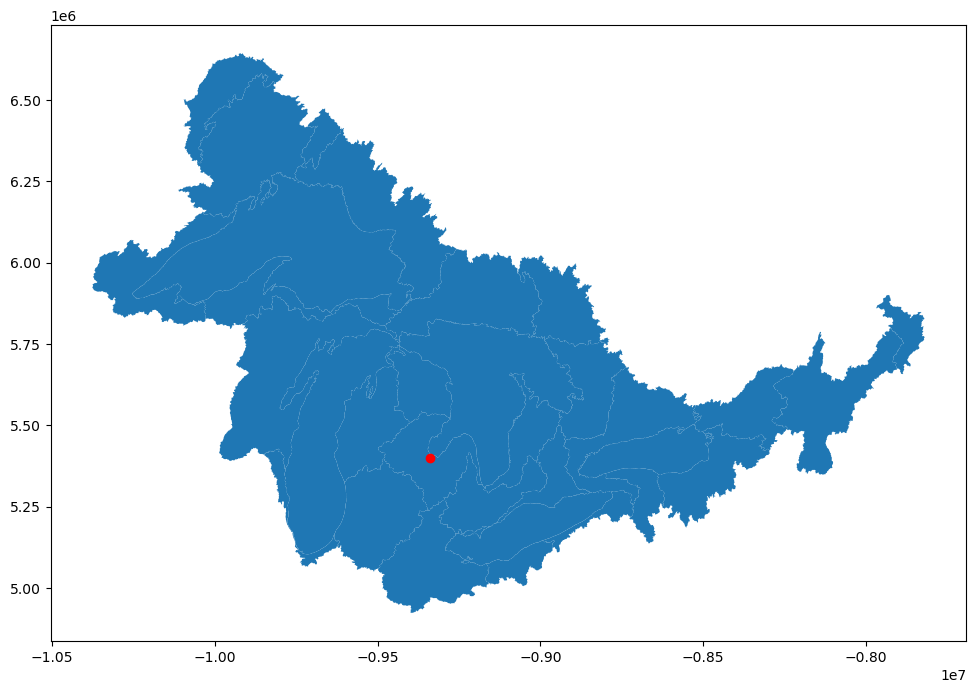

In [159]:
fig, ax = plt.subplots(figsize=(12,8))
basin.plot(ax=ax)
center.plot(ax=ax, color='r')

In [145]:
center_box = center.buffer(10000, cap_style = 3).to_crs(epsg=4269)

In [146]:
# Get bounds of buffered polygon
bounds = list(zip(center_box.bounds['minx'], center_box.bounds['miny'],
                  center_box.bounds['maxx'], center_box.bounds['maxy']))[0]

In [147]:
# Find SWOT granules
pixc_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_PIXC_2.0',
                                       temporal = ('2024-08-01 00:00:00',
                                                    str(datetime.now())),
                                       bounding_box = bounds)

In [148]:
pixc_results

[Collection: {'Version': '2.0', 'ShortName': 'SWOT_L2_HR_PIXC_2.0'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -71.30336972775632, 'SouthBoundingCoordinate': 43.02870544574289, 'EastBoundingCoordinate': -70.29889216655403, 'NorthBoundingCoordinate': 43.788390215962814}]}, 'Track': {'Cycle': 19, 'Passes': [{'Pass': 35, 'Tiles': ['231R']}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-08-01T00:52:59.814Z', 'BeginningDateTime': '2024-08-01T00:52:48.720Z'}}
 Size(MB): 665.9755954742432
 Data: ['https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_PIXC_2.0/SWOT_L2_HR_PIXC_019_035_231R_20240801T005248_20240801T005259_PIC0_01.nc'],
 Collection: {'Version': '2.0', 'ShortName': 'SWOT_L2_HR_PIXC_2.0'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -71.30336972775632, 'SouthBoundingCoordinate': 43.02870544574